In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [2]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [4]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [5]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [6]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [7]:
# Define model plot parameters
modelPlotCount = 50
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [8]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns, dtype=float).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [9]:
# Populate x_modelVars with features variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [10]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [11]:
#y_modelOutput

In [12]:
plotFeatures = 'fastQuads'

In [13]:
sPlotData = dfPlot.copy()

In [14]:
sPlotData = sPlotData.set_index('Name')

In [15]:
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [16]:
sPlotData['hue'] = sPlotData['state'].apply(setHue)

In [17]:
sPlotData.loc['Big Mountain Resort','hue'] = 'Big Mountain Resort'

In [18]:
sPlotData.loc['Big Mountain Resort','hue']

'Big Mountain Resort'

In [19]:
sPlotData['PointSize'] = 0

In [20]:
sPlotData.loc['Big Mountain Resort','PointSize'] = 5

In [21]:
modelLine = pd.DataFrame(index = x_modelVars.index,dtype=float)
modelLine['y'] = y_modelOutput[plotFeatures]
modelLine['x'] = x_modelVars[plotFeatures]

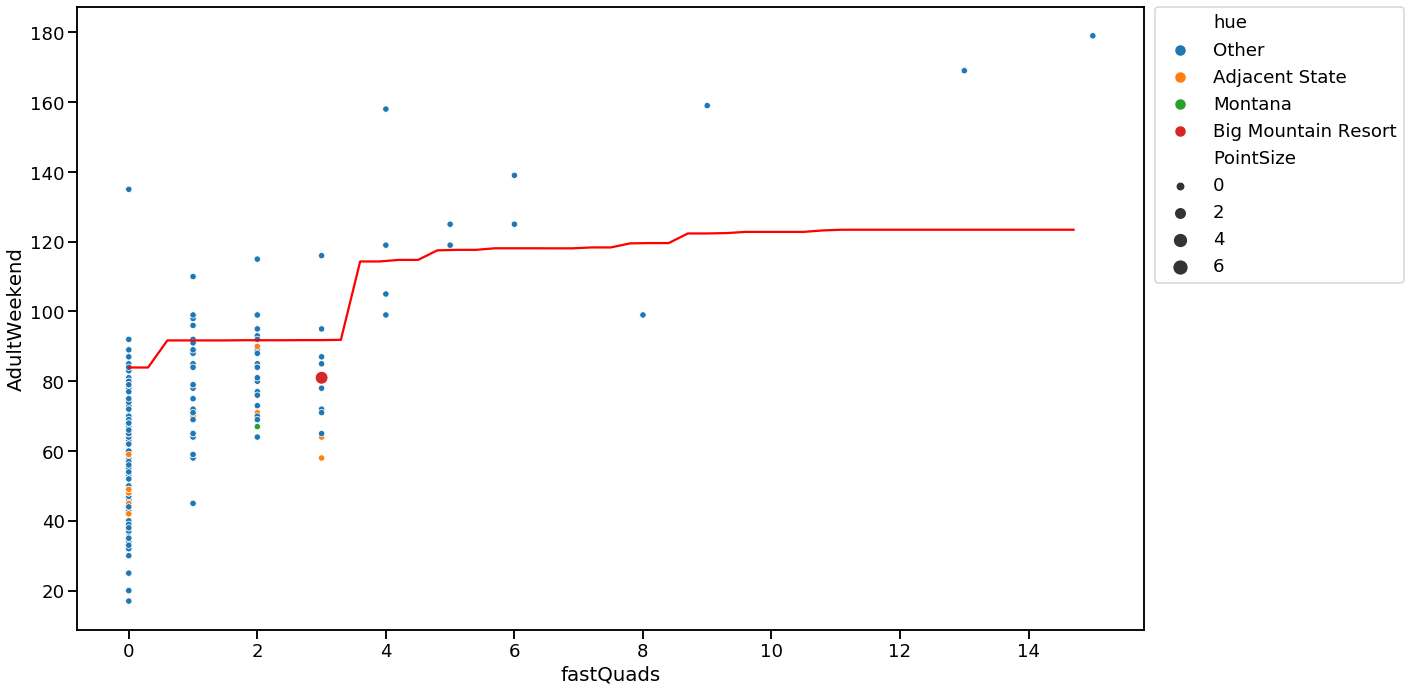

In [22]:
sb.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,10))

sb.lineplot(x='x', y='y', data=modelLine, color='r')
sb.scatterplot(x=plotFeatures, y='AdultWeekend', hue='hue', data=sPlotData, size='PointSize')

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

plt.savefig("default_legend_position_Seaborn_scatterplot.png",
                    format='png',dpi=150)